In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma as gammafunc
from scipy.optimize import curve_fit

# Timeseries of the ICU 
germany_owid = pd.read_csv('../parameters/germany_ourworldindata.csv', sep=',', header=None, usecols=[3,18])
ICUtime = germany_owid[18]

#Cosmo data 
gruppierung = pd.read_csv('../parameters/Gruppierungen.csv', sep=';', header=None, usecols=[0,3,7,11,15])
gespraeche = pd.read_csv('../parameters/Gespraeche.csv', sep=';', header=None, usecols=[0,3,7,11,15])

dates = germany_owid[3]






datesCosmo = gruppierung[0]

agr1 = gruppierung[3]
agr2 = gruppierung[7]
agr3 = gruppierung[11]
agr4 = gruppierung[15]

age1 = gespraeche[3]
age2 = gespraeche[7]
age3 = gespraeche[11]
age4 = gespraeche[15]


#GAMMA DISTRIBUTION----------------
alpha=4
beta=0.7
gamma_cutoff = 40
x = -np.arange(-gamma_cutoff, 0, 1)

probdensity = beta**alpha*x**(alpha-1)*np.e**(-beta*x)/gammafunc(alpha)

#Day that the cosmo data starts (13.10.2020)
cosmostart = 264


# For loop calculates a timeseries of the perceived ICU 
Htime=[]
for times in range(len(dates[cosmostart:])):
    H = 0
    for i in range(gamma_cutoff):
        H = H + probdensity[i]*float(ICUtime[cosmostart+times-gamma_cutoff+i])
    Htime.append(H)
    

    

dict={}
for i,j in zip(dates[cosmostart:], Htime):
    dict[i] = j

ICU_with_memory=[]
for i in datesCosmo[1:]:
    #print(i, dict[f'{i}'])
    ICU_with_memory.append(dict[f'{i}'])
    

In [2]:
# Age structure of Germany (to calculate the average age of each age group)
germany = np.loadtxt('../parameters/germany.csv', delimiter=',')

# AVERAGE AGE 4 AGEGROUPS

avg_age1 = (np.array(germany[18:30,0])*np.array(germany[18:30,1])).sum()/np.sum(germany[18:30,1])
avg_age2 = (np.array(germany[30:50,0])*np.array(germany[30:50,1])).sum()/np.sum(germany[30:50,1])
avg_age3 = (np.array(germany[50:65,0])*np.array(germany[50:65,1])).sum()/np.sum(germany[50:65,1])
avg_age4 = (np.array(germany[65:75,0])*np.array(germany[65:75,1])).sum()/np.sum(germany[65:75,1])


# AVERAGE AGE 6 AGEGROUPS

avg_age1_6 = (np.array(germany[0:20,0])*np.array(germany[0:20,1])).sum()/np.sum(germany[0:20,1])
avg_age2_6 = (np.array(germany[20:40,0])*np.array(germany[20:40,1])).sum()/np.sum(germany[20:40,1])
avg_age3_6 = (np.array(germany[40:60,0])*np.array(germany[40:60,1])).sum()/np.sum(germany[40:60,1])
avg_age4_6 = (np.array(germany[60:70,0])*np.array(germany[60:70,1])).sum()/np.sum(germany[60:70,1])
avg_age5_6 = (np.array(germany[70:80,0])*np.array(germany[70:80,1])).sum()/np.sum(germany[70:80,1])
avg_age6_6 = (np.array(germany[80:,0])*np.array(germany[80:,1])).sum()/np.sum(germany[80:,1])

#Array with the average ages
ages = [avg_age1,avg_age2,avg_age3,avg_age4]

ages6 = [avg_age1_6,avg_age2_6,avg_age3_6,avg_age4_6,avg_age5_6,avg_age6_6]

print('Average ages in the 4 groups:', ages)
print('Average ages in the 6 groups:', ages6)

Average ages in the 4 groups: [23.775517519490993, 39.27444645063195, 56.81487473903967, 69.12733408323959]
Average ages in the 6 groups: [9.414656468588612, 29.863306196070784, 50.245082561761315, 64.21776370915185, 74.29841738197425, 84.63624115156647]


Plateaus for 6 agegroups: [3.68853681 3.97739323 4.265305   4.46268227 4.60508098 4.75111247]
Slopes for 6 agegroups: [0.02306204 0.02098712 0.01891899 0.01750119 0.01647831 0.01542934]


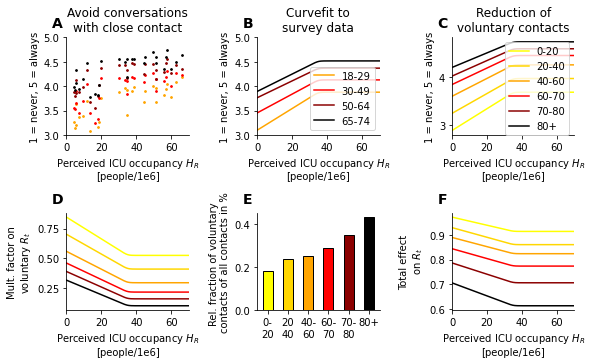

In [6]:
# WITH MEMORY:
ICU = ICU_with_memory

#WITHOUT MEMORY
#ICUdata = pd.read_csv('ICUdates.csv', sep=';', header=0)
#ICU = ICUdata['ICU']


#Watch that ax2 is the left bottom one and not the middle top one etc. 

fig = plt.figure(figsize=(0.9*3*3,0.9*2*2.75), constrained_layout=True)
grid = fig.add_gridspec(ncols=3, nrows=2, hspace=0.2, wspace=0.15)
ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[3], sharex=ax1)

ax3 = fig.add_subplot(grid[1], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(grid[4])

ax5 = fig.add_subplot(grid[2], sharex=ax1)
ax6 = fig.add_subplot(grid[5], sharex=ax1)


for i in [ax1,ax2,ax3,ax4,ax5,ax6]:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)


#Max ICU occupancy in the timeseries:
xmax=70


# TITLES AND LIMITS 

for ax in [ax1, ax2,ax3,ax5,ax6]:
    ax.set_xlabel('Perceived ICU occupancy $H_R$\n[people/1e6]')

ax1.set_xlim(0,xmax)
ax1.set_ylim(3,5)
ax1.set_ylabel('1 = never, 5 = always')
ax1.set_title('Avoid conversations\nwith close contact')

ax2.set_ylabel('Mult. factor on\nvoluntary $R_t$')

ax4.set_ylabel('Rel. fraction of voluntary \ncontacts of all contacts in %')

ax3.set_title('Curvefit to\nsurvey data')
ax3.set_ylabel('1 = never, 5 = always')


ax5.set_title('Reduction of\nvoluntary contacts')
ax5.set_ylabel('1 = never, 5 = always')

ax6.set_ylabel('Total effect\n on $R_t$')


# PANEL LETTERS

for ax, label in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['A','D','B','E','C','F']):
        ax.text(-.12,1.1,label, size=14, weight='bold', color='black', transform=ax.transAxes)

        
# COSMO DATA (because its a string so far...)

group1 = []
group2 = []
group3 = []
group4 = []

# Create arrays 
for i in range(len(datesCosmo)-1):
    group1.append(float(age1[i+1]))
    group2.append(float(age2[i+1]))
    group3.append(float(age3[i+1]))
    group4.append(float(age4[i+1]))


color=['orange','red','darkred','black']
grouparray = [group1,group2,group3,group4]
guesses = [[4.1,0.017], [4.3,0.015], [4.5,0.013], [4.7,0.011]] #initial guesses for the scipy fit 
agegroups = ['18-29', '30-49', '50-64', '65-74']

agegroups6=['0-20','20-40','40-60','60-70','70-80','80+']
color6 = ['yellow','gold','orange','red','darkred','black']

#Fractions Seba calculated with the contact matrices 
fractions=[0.1795,0.2352,0.2488,0.2878,0.3487,0.4296]



# CURVEFIT 
ICUcap = 35 #the ICU beyond which no further reduction happens (to be discussed?)
epsilon = 1 #smoothness of the function

#Shape of the function (first linear, then constant with a smooth transition)
def f(ICU, saturation, slope):
    return saturation - slope*epsilon*np.log(np.e**(1/epsilon*(ICUcap-ICU))+1)

plateaus = []
slopes = []

xICU = np.arange(0,xmax,0.1)
for g,p0,c,ag in zip(grouparray,guesses, color,agegroups): #Fits the function and plots it 
    popt, pcov = curve_fit(f, ICU, g, p0)
    
    ax3.plot(xICU, f(xICU,popt[0],popt[1]), color=c, label=ag)
    
    
    plateaus.append(popt[0])
    slopes.append(popt[1])
    
    
# CONVERTING TO 6 AGEGROUPS 
    
def linf(ages,m,c): #linear function (see below) for the conversion to 6 agegroups 
    return ages*m + c

#Linear fits
popt_plateau, pcov = curve_fit(linf, ages, plateaus)

#calculating the plateaus for the new agegroups 
plateaus_6agegroups = linf(np.array(ages6),popt_plateau[0],popt_plateau[1])

print('Plateaus for 6 agegroups:',plateaus_6agegroups)

popt_slopes, pcov = curve_fit(linf, ages, slopes)

slopes_6agegroups = linf(np.array(ages6),popt_slopes[0],popt_slopes[1])

print('Slopes for 6 agegroups:',slopes_6agegroups)


mappingparam = 2.5 #To be discussed

for plat, slo, c, g, fr in zip(plateaus_6agegroups, slopes_6agegroups, color6, agegroups6, fractions):
    ax5.plot(xICU, f(xICU,plat,slo), color=c, label=g)
    
    #Here we want to map the Cosmo data to an interval of (0,1) instead of (1,5)
    #To be discusses: 
    ax2.plot(xICU, 1-(f(xICU,plat,slo)-mappingparam)/(5-mappingparam), color=c, label=g)
    
    ax6.plot(xICU, 1- fr*((f(xICU,plat,slo)-mappingparam)/(5-mappingparam)), color=c, label=g)


# PANEL A

for group, c in zip(grouparray, color):
    ax1.scatter(ICU,group, color=c, s=3)




#PANEL C AND F 


ax3.legend()
ax5.legend()


#PANEL D

for pos, val, c in zip(range(len(fractions)),fractions, color6):
    ax4.bar(0.5+pos ,val, 0.5,  align='center', edgecolor='black', color=c)

ax4_x = [0.5,1.5,2.5, 3.5, 4.5, 5.5]
ax4.set_xticks(ax4_x)
barxlabels=['0-\n20','20\n40','40-\n60','60-\n70','70-\n80','80+']
ax4.set_xticklabels(barxlabels)




plt.savefig('./figures/cosmo_vs_H.pdf')
plt.show()

Plateaus for 6 agegroups: [3.68853681 3.97739323 4.265305   4.46268227 4.60508098 4.75111247]
Slopes for 6 agegroups: [0.02306204 0.02098712 0.01891899 0.01750119 0.01647831 0.01542934]


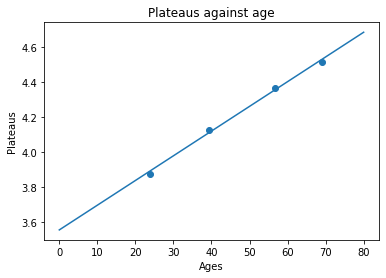

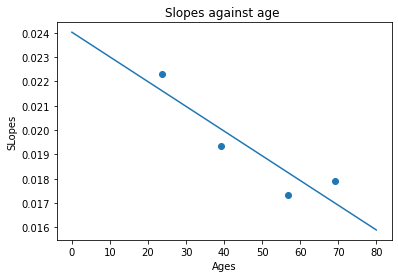

In [4]:
# Plot of how we transfer 4 age groups to 6 agegroups 

popt_plateau, pcov = curve_fit(linf, ages, plateaus)

plateaus_6agegroups = linf(np.array(ages6),popt_plateau[0],popt_plateau[1])

print('Plateaus for 6 agegroups:',plateaus_6agegroups)

popt_slopes, pcov = curve_fit(linf, ages, slopes)

slopes_6agegroups = linf(np.array(ages6),popt_slopes[0],popt_slopes[1])

print('Slopes for 6 agegroups:',slopes_6agegroups)

plt.title('Plateaus against age')
plt.scatter(ages,plateaus)
plt.plot(np.linspace(0,80,80), linf(np.linspace(0,80,80), popt_plateau[0],popt_plateau[1]))
plt.xlabel('Ages')
plt.ylabel('Plateaus')
plt.show()

plt.title('Slopes against age ')
plt.scatter(ages,slopes)
plt.plot(np.linspace(0,80,80), linf(np.linspace(0,80,80), popt_slopes[0],popt_slopes[1]))
plt.xlabel('Ages')
plt.ylabel('SLopes')
plt.show()

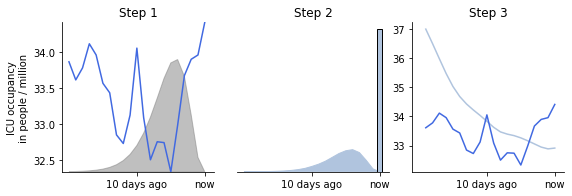

In [5]:
#Plot of how the perceived ICU works 


figg = plt.figure(figsize=(9,2.75), constrained_layout=False)
grid = fig.add_gridspec(ncols=3, nrows=1, hspace=0.2, wspace=0.15)

axg3 = figg.add_subplot(grid[2])
axg = figg.add_subplot(grid[0], sharex=axg3)
axg2 = figg.add_subplot(grid[1], sharex=axg3)


for i in [axg, axg2, axg3]:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    

axg2.spines['left'].set_visible(False)
    
t = np.arange(-gamma_cutoff,1,1)

color={'t':'royalblue', 't0':'lightsteelblue'}


startday=380
ICUtimeseries =[]
for i in ICUtime[startday:startday+gamma_cutoff+1]:
    ICUtimeseries.append(float(i))
    
probdensity = beta**alpha*(-t)**(alpha-1)*np.e**(-beta*(-t))/gammafunc(alpha)    

convolution = np.array(ICUtimeseries[20:])* np.array(probdensity[20:])

Htime=[]
for times in range(round(len(t)/2)):
    H = 0
    for i in range(round(gamma_cutoff/2)):
        #H = np.array(ICUtimeseries[20:])* np.array(probdensity[20:])
        H = H + probdensity[20+i]* ICUtimeseries[i+times]    #float(ICUtime[cosmostart+times-gamma_cutoff+i])
    Htime.append(H)

#ICU TIME
axg.plot(t[20:],ICUtimeseries[20:], color=color['t'])

#KERNEL 
#axg.plot(t[20:],probdensity[20:]/np.max(probdensity)*np.max(ICUtimeseries), color='dimgray', alpha=0.5)
axg.fill(t[20:],probdensity[20:]*10+np.min(ICUtimeseries[20:]), color='gray', alpha=0.5)

#FILLED SHAPE AT 0
axg2.fill(t[20:],convolution, color=color['t0'])

#BAR PLOT AT 0
axg2.bar(0,convolution.sum(), 0.75, align='center', color=color['t0'], edgecolor='black')

#H TIME
axg3.plot(t[21:],Htime, color=color['t0'])
axg3.plot(t[21:],ICUtimeseries[21:],color=color['t'])



#----------PLOTTING ---------------

axg.set_ylim(np.min(ICUtimeseries[20:]), np.max(ICUtimeseries[20:]))

axg3_x = [-10,0]
axg3labels=['10 days ago','now']
axg3.set_xticks(axg3_x)
axg3.set_xticklabels(axg3labels)

axg2_y = []
axg2labels=[]
axg2.set_yticks(axg2_y)
axg2.set_yticklabels(axg2labels)

titles= ['Step 1', 'Step 2', 'Step 3']
ylabels = ['ICU occupancy\nin people / million']

for axes, tit in zip([axg,axg2,axg3], titles):
    axes.set_title(tit)
    
axg.set_ylabel(ylabels[0])

#plt.savefig('kernel_explanation.pdf')
